In [1]:
import pandas as pd
import numpy as np
from ak_pynn.mlp import MLP

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
df=pd.read_csv('./datasets/digit_pixels.csv')

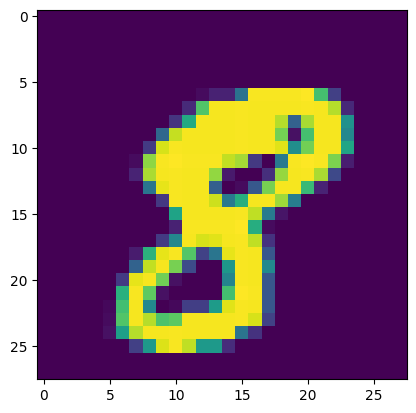

label -->8


In [3]:
import plotly.express as px
from matplotlib import pyplot as plt
X = df.iloc[:, 1:].values
Y = df.iloc[:, 0].values
img = X[10].reshape(28,28)
plt.imshow(img)
plt.show()
print('label -->'+str(Y[10]))
Y=np.array(pd.get_dummies(Y))
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)



                                ( MODEL SUMMARY )                        
        
               Layer           Activation    Output Shape      Params    

               Input             linear      (None, 784)         0       
        -------------------------------------------------------------------

               Dense              tanh       (None, 256)       200960    
        -------------------------------------------------------------------

         BatchNormalization       None       (None, 256)        1024     
        -------------------------------------------------------------------

               Output           softmax       (None, 10)        2570     
        -------------------------------------------------------------------


        Total Params  - 204554
        Trainable Params  - 204042
        Non-Trainable Params  - 512
        ___________________________________________________________________
        


EPOCH 15 : 100%|██████████| 135/135 [00:05<00:00, 23.15it/s, Loss: 0.12414 - mse: 0.00528 - accuracy: 0.99347 - val_loss: 0.12355 - val_mse: 0.00537 - val_accuracy: 0.99318]



Minimised Loss : 0.12414055, Training metrics : {'mse': 0.00528167, 'accuracy': 0.9934673} 

Training complete!! , Average Elapse-Time (per epoch) : 5.84658 seconds
========================================================================= :)


0.9488095238095238

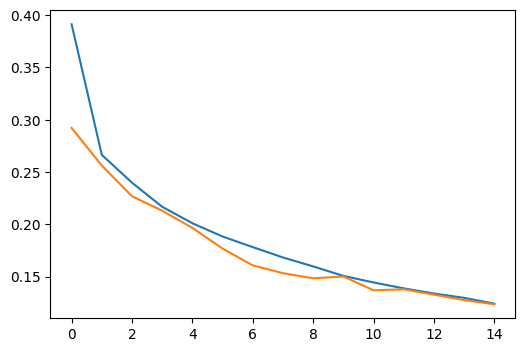

In [11]:
model = MLP()
model.add_layer(784,input_layer=True)
model.add_layer(256,activation_function='tanh',batch_norm=True)
model.add_layer(10,activation_function='softmax',output_layer=True)
model.compile_model(loss_function='categorical_cross_entropy',metrics=['mse','accuracy'])
losses=model.fit(X_train, Y_train,epochs=15,batch_size=200,verbose=True,validation_split=0.2)
Y_pred = model.predict(X_test)
plt.plot(model.history['Losses'])
plt.plot(model.history['Val_Losses'])
Y_p = np.argmax(Y_pred,axis=1)
Y_t= np.argmax(Y_test,axis=1)
accuracy_score(Y_t,Y_p)


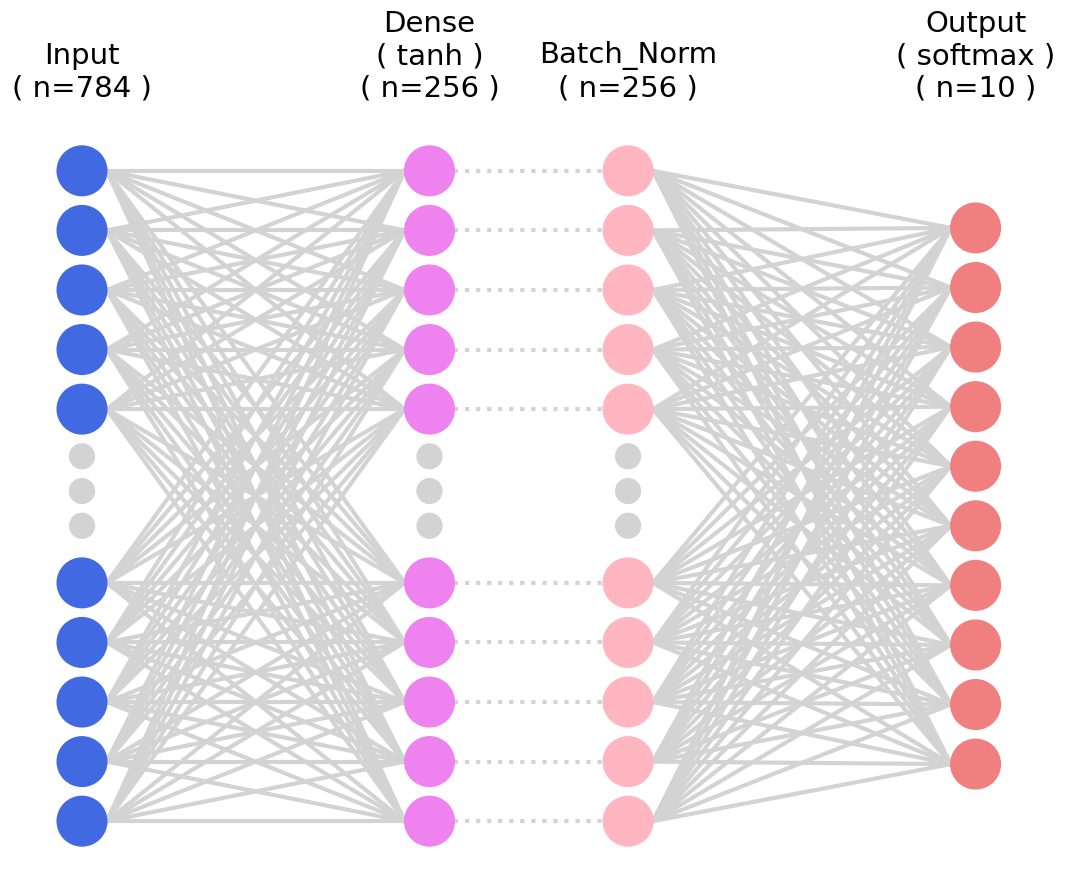

In [5]:
model.visualize()

In [6]:
import pickle
pickle.dump(model,open('mnist_akpynn.pkl','wb'))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 204,554
Trainable params: 204,042
Non-trainable params: 512
_________________________________________________________________
Epoch 1/15
135/135 [==============================] - 4s 15ms/step - loss: 0.6451 - mse: 0.0283 - accuracy: 0.8022 - val_loss: 0.5539 - val_mse: 0.0258 - val_accuracy: 0.8292
Epoch 2/15
135/135 [==============================] - 2s 12ms/step - lo

0.9420238095238095

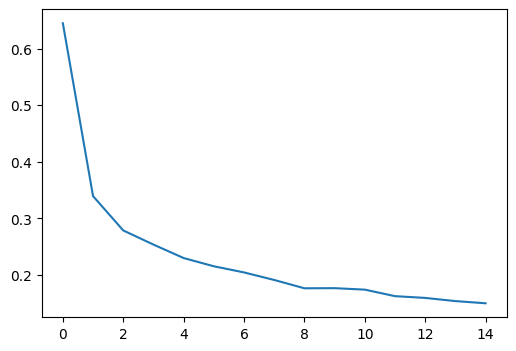

In [7]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,BatchNormalization
model = Sequential()
model.add(Dense(256, activation='tanh', input_dim=784))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))
model.compile(loss='CategoricalCrossentropy', metrics=['mse','accuracy'])
model.summary()
history = model.fit(X_train, Y_train, epochs=15,verbose=1,batch_size=200,validation_split=0.2)
Y_pred = model.predict(X_test)
plt.plot(history.history['loss'])
Y_p = np.argmax(Y_pred,axis=1)
Y_t= np.argmax(Y_test,axis=1)
accuracy_score(Y_t, Y_p)